k-Means Clustering:

1. Select k random points within the data
2. Assign Points to Closest Seed Point
3. Identify New Centre Points
4. Assign Points to Closest Centroid
5. Identify the New Cluster Centres
6. Repeat Steps 4–6
7. Maximum number of iterations has been reached or
   a convergence has occurred

$$
    \text{Euclidean Distance}\\
    \text{One dimension}\\
    d(p,q)=\sqrt{(p-q)^2}\\
    \text{Two dimensions}\\
    d(p,q)=\sqrt{(p_1-q_1)^2 + (p_2-q_2)^2}\\
    \text{n dimensions}\\
    d(p,q)=\sqrt{\sum_{i=1}^{n}(p_i-q_i)^2}\\
$$

In [1]:
import numpy as np
import ia_misc as ia
import matplotlib.pyplot as plt

1. Select k random points within the data

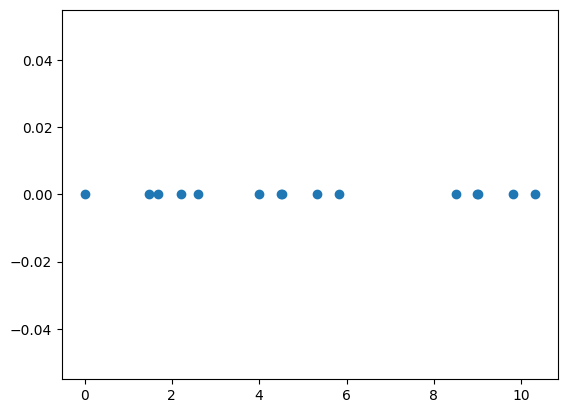

In [4]:
data = ia.getClusters(5,8.5,4)

x = data['x']
y = np.zeros(len(data['x']))

(-1.0, 11.0)

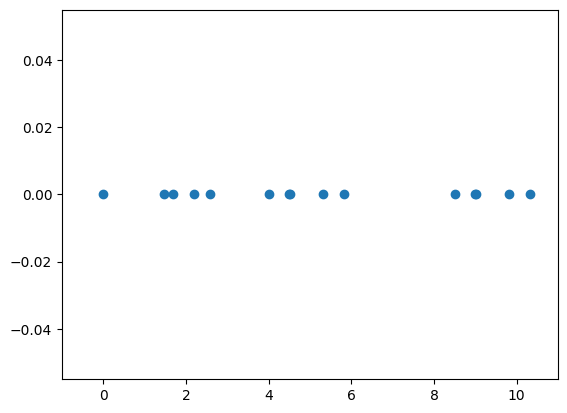

In [77]:
plt.scatter(x,y)
plt.xlim(-1,11)

In [32]:
k = 3

centros_indice = np.random.permutation(len(x))[:k]
print(centros_indice)

[14  6  1]


(-1.0, 11.0)

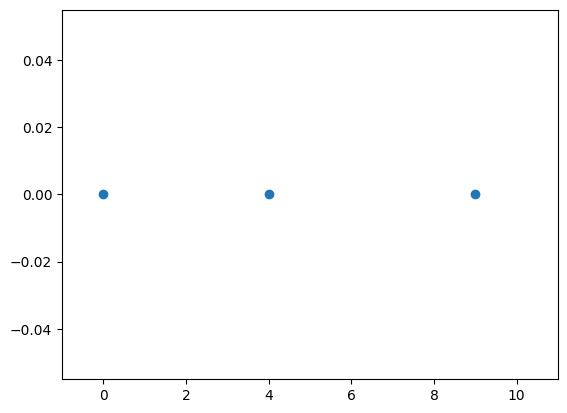

In [75]:
plt.scatter(x[centros_indice],y=np.zeros(len(centros_indice)))
plt.xlim(-1,11)

2. Assign Points to Closest Seed Point

In [63]:
clusters = {}
sigma = 2

for centro in centros_indice:
    clusters[x[centro]] = []
    for punto in x:
        distancia = ia.euclidian_distance(x[centro],punto)
        
        if distancia <= sigma:
            clusters[x[centro]].append(punto)

In [64]:
clusters

{4.0: [2.199292950273732,
  2.588711707123597,
  5.826384464831964,
  4.4906583477931274,
  4.5181127583012675,
  5.313952497694906,
  4.0],
 8.990658347793127: [10.326384464831964,
  8.990658347793127,
  9.018112758301267,
  9.813952497694906,
  8.5],
 0.0: [1.4766171977310998, 0.0, 1.6766527323243379]}

3. Identify New Centre Points

In [68]:
centros = []
for cluster in clusters:
    centros.append(np.mean(clusters[cluster]))
    
centros

[4.133873246574085, 9.329821613724253, 1.051089976685146]

(-1.0, 11.0)

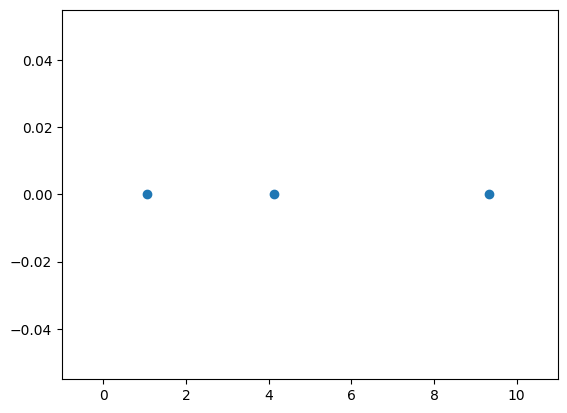

In [76]:
plt.scatter(centros,y=np.zeros(len(centros)))
plt.xlim(-1,11)

4. Assign Points to Closest Centroid

In [82]:
clusters = {}
sigma = 2

for centro in centros:
    clusters[centro] = []
    for punto in x:
        distancia = ia.euclidian_distance(centro,punto)
        
        if distancia <= sigma:
            clusters[centro].append(punto)

In [84]:
clusters

{4.133873246574085: [2.199292950273732,
  2.588711707123597,
  5.826384464831964,
  4.4906583477931274,
  4.5181127583012675,
  5.313952497694906,
  4.0],
 9.329821613724253: [10.326384464831964,
  8.990658347793127,
  9.018112758301267,
  9.813952497694906,
  8.5],
 1.051089976685146: [1.4766171977310998,
  0.0,
  2.199292950273732,
  2.588711707123597,
  1.6766527323243379]}

5. Identify the New Cluster Centres

In [85]:
centros = []
for cluster in clusters:
    centros.append(np.mean(clusters[cluster]))
    
centros

[4.133873246574085, 9.329821613724253, 1.5882549174905534]

In [86]:
clusters = {}
sigma = 2

for centro in centros:
    clusters[centro] = []
    for punto in x:
        distancia = ia.euclidian_distance(centro,punto)
        
        if distancia <= sigma:
            clusters[centro].append(punto)

In [87]:
centros = []
for cluster in clusters:
    centros.append(np.mean(clusters[cluster]))
    
centros

[4.133873246574085, 9.329821613724253, 1.5882549174905534]

In [ ]:
centros_previo = [4.133873246574085, 9.329821613724253, 1.5882549174905534]

bandera_val = 0
sigma_conv = 0.005

for indx, centro in enumerate(centros):
    if np.abs(centros_previo[indx] - centro) <= sigma_conv:
        bandera_val += 1

if bandera_val == k:
    print("Converegencia")